In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install statsmodels
!pip install utils

import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import utils
from tqdm import tqdm

In [111]:
pd.set_option("display.max_columns", None)
games = pd.read_csv('games.csv')
players_df = pd.read_csv('players.csv')
play_df = pd.read_csv('plays.csv')
tackle_df = pd.read_csv('tackles.csv')
week1 = pd.read_csv('tracking_week_1.csv')

In [112]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [113]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [114]:
play_df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [115]:
tackle_df.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [116]:
week1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [117]:
merge_df = pd.merge(week1, players_df, on='nflId')

In [118]:
merge_df.head()

,gameId,playId,nflId,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,height,weight,birthDate,collegeName,position,displayName_y
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,6-5,325,1988-06-06,Indiana,G,Rodger Saffold
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,6-5,325,1988-06-06,Indiana,G,Rodger Saffold
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,6-5,325,1988-06-06,Indiana,G,Rodger Saffold
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,6-5,325,1988-06-06,Indiana,G,Rodger Saffold
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,6-5,325,1988-06-06,Indiana,G,Rodger Saffold


In [119]:
merge_df = merge_df[merge_df['displayName_x'] != 'football']
merge_df = merge_df.dropna(how='all')

In [120]:
merge_df['height'] = pd.to_numeric(merge_df['height'], errors='coerce')

In [121]:
merge_df.shape

(1346246, 23)

In [122]:
play_df=play_df.drop(["foulName1", "foulName2","foulNFLId1", "foulNFLId2"],axis=1)

In [123]:
merge_all = pd.merge(merge_df, play_df, on=['gameId','playId'])

In [124]:
merge_all.head()

,gameId,playId,nflId,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,height,weight,birthDate,collegeName,position,displayName_y,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442


In [125]:
merge_all.shape

(1346246, 52)

In [126]:
merge_all = pd.merge(merge_all, games, on=['gameId'], how='left')

In [127]:
merge_all.shape

(1346246, 60)

In [128]:
merge_all.head()

,gameId,playId,nflId,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,height,weight,birthDate,collegeName,position,displayName_y,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31


In [129]:
merge_all = pd.merge(merge_all, tackle_df, on=['gameId', 'playId', 'nflId'], how='left')

In [130]:
merge_all.head()

,gameId,playId,nflId,displayName_x,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,height,weight,birthDate,collegeName,position,displayName_y,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,NaN,NaN,NaN,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,NaN,NaN,NaN,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,NaN,NaN,NaN,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,NaN,NaN,NaN,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,NaN,325,1988-06-06,Indiana,G,Rodger Saffold,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.68996,0.413347,0.586653,-0.000031,0.000031,1.298699,0.00442,2022,1,09/08/2022,20:20:00,LA,BUF,10,31,NaN,NaN,NaN,NaN


In [148]:
def split_play_and_player_cols(all, predicting=False):
    all['IsRusher'] = all['nflId'] == all['ballCarrierId']

    all['playId'] = all['playId'].astype(str)

    # We must assume here that the first 22 rows correspond to the same player:
    player_cols = [
        'playId',
        'club',
        'x',
        'y',
        's',
        'a',
        'height',
        'weight',
        'o',
        'dis',
        'dir',
        'nflId',
        'IsRusher'
    ]

    df_players = all[player_cols]

    play_cols = [
        'playId',
        'possessionTeam',
        'homeTeamAbbr',
        'visitorTeamAbbr',
        'defensiveTeam',
        'yardlineNumber',
        'playDirection',
        'club',
        'position',
        'playResult'
    ]
    if not predicting:
        play_cols.append('tackle')

    df_play = all[play_cols].copy()

    # Get first
    df_play = df_play.groupby('playId').first().reset_index()

    print('rows/plays in df: ', len(df_play))
    assert df_play.playId.nunique() == all.playId.nunique(), "Play/player split failed?"  # Boom

    return df_play, df_players

play_ids = merge_all["playId"].unique()

df_play, df_players = split_play_and_player_cols(merge_all)

rows/plays in df:  1247


In [149]:
df_play.shape

(1247, 11)

In [150]:
df_players.shape

(1346246, 13)

In [151]:
df_play.head()

,playId,possessionTeam,homeTeamAbbr,visitorTeamAbbr,defensiveTeam,yardlineNumber,playDirection,club,position,playResult,tackle
0,100,LAC,LAC,LV,LV,34,right,LV,DE,2,0.0
1,1004,SEA,SEA,DEN,DEN,20,left,DEN,SS,8,1.0
2,1006,LAC,LAC,LV,LV,5,left,LV,DE,4,1.0
3,1008,HOU,HOU,IND,IND,41,left,IND,CB,2,1.0
4,101,BUF,LA,BUF,LA,38,left,BUF,G,7,1.0


In [152]:
df_players.head()

,playId,club,x,y,s,a,height,weight,o,dis,dir,nflId,IsRusher
0,56,BUF,88.37,27.27,1.62,1.15,NaN,325,231.74,0.16,147.90,35472.0,False
1,56,BUF,88.47,27.13,1.67,0.61,NaN,325,230.98,0.17,148.53,35472.0,False
2,56,BUF,88.56,27.01,1.57,0.49,NaN,325,230.98,0.15,147.05,35472.0,False
3,56,BUF,88.64,26.90,1.44,0.89,NaN,325,232.38,0.14,145.42,35472.0,False
4,56,BUF,88.72,26.80,1.29,1.24,NaN,325,233.36,0.13,141.95,35472.0,False


In [153]:
df_play['HomePossession'] = df_play['possessionTeam'] == df_play['homeTeamAbbr']

In [154]:
def process_play_direction(df):
    df['IsPlayLeftToRight'] = df['playDirection'].apply(lambda val: True if val.strip() == 'right' else False)
    return

process_play_direction(df_play)

In [155]:
def process_yard_til_end_zone(df):
    def convert_to_yardline100(row):
        return (100 - row['yardlineNumber']) if (row['possessionTeam'] == row['position']) else row['yardlineNumber']
    df['Yardline100'] = df.apply(convert_to_yardline100, axis=1)
    return

process_yard_til_end_zone(df_play)

In [156]:
df_players = df_players.merge(
    df_play[['playId', 'possessionTeam', 'homeTeamAbbr', 'playDirection', 'Yardline100','tackle']], 
    how='left', on='playId')

In [157]:
df_players.head()

,playId,club,x,y,s,a,height,weight,o,dis,dir,nflId,IsRusher,possessionTeam,homeTeamAbbr,playDirection,Yardline100,tackle
0,56,BUF,88.37,27.27,1.62,1.15,NaN,325,231.74,0.16,147.90,35472.0,False,BUF,LA,left,25,1.0
1,56,BUF,88.47,27.13,1.67,0.61,NaN,325,230.98,0.17,148.53,35472.0,False,BUF,LA,left,25,1.0
2,56,BUF,88.56,27.01,1.57,0.49,NaN,325,230.98,0.15,147.05,35472.0,False,BUF,LA,left,25,1.0
3,56,BUF,88.64,26.90,1.44,0.89,NaN,325,232.38,0.14,145.42,35472.0,False,BUF,LA,left,25,1.0
4,56,BUF,88.72,26.80,1.29,1.24,NaN,325,233.36,0.13,141.95,35472.0,False,BUF,LA,left,25,1.0


In [158]:
df_players.shape

(1346246, 18)

In [159]:
def standarize_direction(df):
    # adjusted the data to always be from left to right
    df['homePossesion'] = df['possessionTeam'] == df['homeTeamAbbr']

    df['Dir_rad'] = np.mod(90 - df.dir, 360) * math.pi/180.0

    df['ToLeft'] = df.playDirection == "left"
    df['TeamOnOffense'] = "home"
    df.loc[df.possessionTeam != df.homeTeamAbbr, 'TeamOnOffense'] = "away"
    df['IsOnOffense'] = df.club == df.TeamOnOffense # Is player on offense?
    df['X_std'] = df.x
    df.loc[df.ToLeft, 'X_std'] = 120 - df.loc[df.ToLeft, 'x']
    df['Y_std'] = df.y
    df.loc[df.ToLeft, 'Y_std'] = 160/3 - df.loc[df.ToLeft, 'y']
    df['Dir_std'] = df.Dir_rad
    df.loc[df.ToLeft, 'Dir_std'] = np.mod(np.pi + df.loc[df.ToLeft, 'Dir_rad'], 2*np.pi)
   
    #Replace Null in Dir_rad
    df.loc[(df.IsOnOffense) & df['Dir_std'].isna(),'Dir_std'] = 0.0
    df.loc[~(df.IsOnOffense) & df['Dir_std'].isna(),'Dir_std'] = np.pi

standarize_direction(df_players)

In [160]:
df_players.head()

,playId,club,x,y,s,a,height,weight,o,dis,dir,nflId,IsRusher,possessionTeam,homeTeamAbbr,playDirection,Yardline100,tackle,homePossesion,Dir_rad,ToLeft,TeamOnOffense,IsOnOffense,X_std,Y_std,Dir_std
0,56,BUF,88.37,27.27,1.62,1.15,NaN,325,231.74,0.16,147.90,35472.0,False,BUF,LA,left,25,1.0,False,5.272640,True,away,False,31.63,26.063333,2.131047
1,56,BUF,88.47,27.13,1.67,0.61,NaN,325,230.98,0.17,148.53,35472.0,False,BUF,LA,left,25,1.0,False,5.261644,True,away,False,31.53,26.203333,2.120051
2,56,BUF,88.56,27.01,1.57,0.49,NaN,325,230.98,0.15,147.05,35472.0,False,BUF,LA,left,25,1.0,False,5.287475,True,away,False,31.44,26.323333,2.145882
3,56,BUF,88.64,26.90,1.44,0.89,NaN,325,232.38,0.14,145.42,35472.0,False,BUF,LA,left,25,1.0,False,5.315924,True,away,False,31.36,26.433333,2.174331
4,56,BUF,88.72,26.80,1.29,1.24,NaN,325,233.36,0.13,141.95,35472.0,False,BUF,LA,left,25,1.0,False,5.376487,True,away,False,31.28,26.533333,2.234894


In [161]:
df_players.shape

(1346246, 26)

In [162]:
def data_augmentation(df, sample_ids):
    df_sample = df.loc[df.playId.isin(sample_ids)].copy()
    df_sample['Y_std'] = 160/3  - df_sample['Y_std']
    df_sample['Dir_std'] = df_sample['Dir_std'].apply(lambda x: 2*np.pi - x)
    df_sample['playId'] = df_sample['playId'].apply(lambda x: x+'_aug')
    return df_sample

def process_tracking_data(df):
    # More feature engineering for all:
    df['Sx'] = df['s']*df['Dir_std'].apply(math.cos)
    df['Sy'] = df['s']*df['Dir_std'].apply(math.sin)
    
    # ball carrier position
    rushers = df[df['IsRusher']].copy()
    rushers_1 = rushers.drop_duplicates(subset='playId')
    rushers_1.set_index('playId', inplace=True, drop=True)
    rushers.set_index('playId', inplace=True, drop=True)
    playId_rusher_map = rushers_1[['X_std', 'Y_std', 'Sx', 'Sy']].to_dict(orient='index')
    rusher_x = df['playId'].apply(lambda val: playId_rusher_map[val]['X_std'])
    rusher_y = df['playId'].apply(lambda val: playId_rusher_map[val]['Y_std'])
    rusher_Sx = df['playId'].apply(lambda val: playId_rusher_map[val]['Sx'])
    rusher_Sy = df['playId'].apply(lambda val: playId_rusher_map[val]['Sy'])
    
    # Calculate differences between the rusher and the players:
    df['player_minus_rusher_x'] = rusher_x - df['X_std']
    df['player_minus_rusher_y'] = rusher_y - df['Y_std']

    # Velocity parallel to direction of rusher:
    df['player_minus_rusher_Sx'] = rusher_Sx - df['Sx']
    df['player_minus_rusher_Sy'] = rusher_Sy - df['Sy']

    return

sample_ids = np.random.choice(df_play.playId.unique(), int(0.5*len(df_play.playId.unique())))

df_players_aug = data_augmentation(df_players, sample_ids)
df_players = pd.concat([df_players, df_players_aug])
df_players.reset_index()

df_play_aug = df_play.loc[df_play.playId.isin(sample_ids)].copy()
df_play_aug['playId'] = df_play_aug['playId'].apply(lambda x: x+'_aug')
df_play = pd.concat([df_play, df_play_aug])
df_play.reset_index()

# This is necessary to maintain the order when in the next cell we use groupby
df_players.sort_values(by=['playId'],inplace=True)
df_play.sort_values(by=['playId'],inplace=True)

process_tracking_data(df_players)

In [163]:
tracking_level_features = [
    'playId',
    'IsOnOffense',
    'X_std',
    'Y_std',
    'Sx',
    'Sy',
    'player_minus_rusher_x',
    'player_minus_rusher_y',
    'player_minus_rusher_Sx',
    'player_minus_rusher_Sy',
    'IsRusher',
    'tackle'
]

df_all_feats = df_players[tracking_level_features]

print('Any null values: ', df_all_feats.isnull().sum().sum())

Any null values:  26576


In [164]:
df_all_feats

,playId,IsOnOffense,X_std,Y_std,Sx,Sy,player_minus_rusher_x,player_minus_rusher_y,player_minus_rusher_Sx,player_minus_rusher_Sy,IsRusher,tackle
1045002,100,False,50.78,15.15,0.510166,0.894780,-6.87,7.53,2.039783,-0.910802,False,0.0
1044708,100,False,44.19,17.85,-0.235606,0.045712,-0.28,4.83,2.785556,-0.061734,False,0.0
1044709,100,False,44.16,17.86,-0.337187,0.175229,-0.25,4.82,2.887136,-0.191251,False,0.0
1044710,100,False,44.13,17.90,-0.410395,0.366163,-0.22,4.78,2.960345,-0.382185,False,0.0
1044711,100,False,44.09,17.95,-0.423667,0.544616,-0.18,4.73,2.973616,-0.560638,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
497469,999_aug,False,110.12,36.51,0.023901,-1.649827,-2.43,-29.79,1.036833,-1.622549,False,1.0
497470,999_aug,False,110.12,36.35,0.080831,-1.617982,-2.43,-29.63,0.979903,-1.654394,False,1.0
497471,999_aug,False,110.13,36.18,0.043000,-1.599422,-2.44,-29.46,1.017734,-1.672954,False,1.0
497465,999_aug,False,110.07,37.22,0.290844,-1.948412,-2.38,-30.50,0.769890,-1.323964,False,1.0


In [165]:
df_all_feats.shape

(1898138, 12)

In [167]:
df_all_feats.to_csv('df_all_feats.csv', index=False)

In [166]:
from tqdm import tqdm

In [191]:
grouped = df_all_feats.groupby('playId')
train_x = np.zeros([len(grouped.size()), 11, 10, 10])
i = 0
play_ids = df_play.playId.values

for name, group in grouped:
    if name != play_ids[i]:
        print("Error")
    
    #df_all_feats_fil=df_all_feats[df_all_feats["IsRusher"]==1]
    #[rusher_x, rusher_y, rusher_Sx, rusher_Sy] = group.loc[:, ['X_std', 'Y_std', 'Sx', 'Sy']].values
    #[[rusher_x, rusher_y, rusher_Sx, rusher_Sy]] = group.loc[group.IsRusher==1,['X_std', 'Y_std','Sx','Sy']].values

    offense_ids = group[group.IsOnOffense & ~group.IsRusher].index
    defense_ids = group[~group.IsOnOffense].index

    # Check if offense_ids is not empty before using its values
    if not offense_ids.empty:
        for j, defense_id in enumerate(defense_ids):
            [def_x, def_y, def_Sx, def_Sy] = group.loc[defense_id, ['X_std', 'Y_std', 'Sx', 'Sy']].values
            [def_rusher_x, def_rusher_y] = group.loc[defense_id, ['player_minus_rusher_x', 'player_minus_rusher_y']].values
            [def_rusher_Sx, def_rusher_Sy] = group.loc[defense_id, ['player_minus_rusher_Sx', 'player_minus_rusher_Sy']].values

            train_x[i, j, :, :4] = group.loc[offense_ids, ['Sx', 'Sy', 'X_std', 'Y_std']].values - np.array(
                [def_Sx, def_Sy, def_x, def_y])
            train_x[i, j, :, -6:] = [def_rusher_Sx, def_rusher_Sy, def_rusher_x, def_rusher_y, def_Sx, def_Sy]

    i += 1

np.save('train_x_v3(augmented-50).npy', train_x)


In [192]:
train_x

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [278]:
# Transform Y into indexed-classes:
train_y = df_play[['playId', 'yardlineNumber']].copy()

train_y['YardIndex'] = train_y['yardlineNumber'].apply(lambda val: val + 99)

min_idx_y = 71
max_idx_y = 150

train_y['YardIndexClipped'] = train_y['YardIndex'].apply(
    lambda val: min_idx_y if val < min_idx_y else max_idx_y if val > max_idx_y else val)

print('max yardIndex: ', train_y.YardIndex.max())
print('max yardIndexClipped: ', train_y.YardIndexClipped.max())
print('min yardIndex: ', train_y.YardIndex.min())
print('min yardIndexClipped: ', train_y.YardIndexClipped.min())

train_y.to_pickle('train_y_v3.pkl')
train_y

max yardIndex:  149
max yardIndexClipped:  149
min yardIndex:  100
min yardIndexClipped:  100


,playId,yardlineNumber,YardIndex,YardIndexClipped
0,100,34,133,133
1,1004,20,119,119
1,1004_aug,20,119,119
2,1006,5,104,104
2,1006_aug,5,104,104
...,...,...,...,...
1243,994_aug,44,143,143
1244,996,35,134,134
1245,998,45,144,144
1246,999,5,104,104


In [194]:
df_season = df_play[['playId']].copy()
df_season.to_pickle('df_season_v3.pkl')

In [195]:
train_x = np.load('train_x_v3(augmented-50).npy') 
train_y = pd.read_pickle('train_y_v3.pkl') 
df_season = pd.read_pickle('df_season_v3.pkl')

#num_classes_y = 199
min_idx_y = 71
max_idx_y = 150
num_classes_y = max_idx_y - min_idx_y + 1

In [196]:
from tensorflow.keras.models import Model

from tensorflow.keras.layers import (
    Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, AvgPool1D, AvgPool2D, Reshape,
    Input, Activation, BatchNormalization, Dense, Add, Lambda, Dropout, LayerNormalization)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, EarlyStopping

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def crps(y_true, y_pred):
    loss = K.mean(K.sum((K.cumsum(y_pred, axis = 1) - K.cumsum(y_true, axis=1))**2, axis=1))/199
    return loss

In [197]:
def get_conv_net(num_classes_y):
    #_, x, y, z = train_x.shape
    inputdense_players = Input(shape=(11,10,10), name = "playersfeatures_input")
    
    X = Conv2D(128, kernel_size=(1,1), strides=(1,1), activation='relu')(inputdense_players)
    X = Conv2D(160, kernel_size=(1,1), strides=(1,1), activation='relu')(X)
    X = Conv2D(128, kernel_size=(1,1), strides=(1,1), activation='relu')(X)
    
    # The second block of convolutions learns the necessary information per defense player before the aggregation.
    # For this reason the pool_size should be (1, 10). If you want to learn per off player the pool_size must be 
    # (11, 1)
    Xmax = MaxPooling2D(pool_size=(1,10))(X)
    Xmax = Lambda(lambda x1 : x1*0.3)(Xmax)

    Xavg = AvgPool2D(pool_size=(1,10))(X)
    Xavg = Lambda(lambda x1 : x1*0.7)(Xavg)

    X = Add()([Xmax, Xavg])
    X = Lambda(lambda y : K.squeeze(y,2))(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(160, kernel_size=1, strides=1, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv1D(96, kernel_size=1, strides=1, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Conv1D(96, kernel_size=1, strides=1, activation='relu')(X)
    X = BatchNormalization()(X)
    
    Xmax = MaxPooling1D(pool_size=11)(X)
    Xmax = Lambda(lambda x1 : x1*0.3)(Xmax)

    Xavg = AvgPool1D(pool_size=11)(X)
    Xavg = Lambda(lambda x1 : x1*0.7)(Xavg)

    X = Add()([Xmax, Xavg])
    X = Lambda(lambda y : K.squeeze(y,1))(X)
    
    X = Dense(96, activation="relu")(X)
    X = BatchNormalization()(X)

    X = Dense(256, activation="relu")(X)
    X = LayerNormalization()(X)
    X = Dropout(0.3)(X)

    outsoft = Dense(num_classes_y, activation='softmax', name = "output")(X)

    model = Model(inputs = [inputdense_players], outputs = outsoft)
    return model

In [198]:
class Metric(Callback):
    def __init__(self, model, callbacks, data):
        super().__init__()
        self.model = model
        self.callbacks = callbacks
        self.data = data

    def on_train_begin(self, logs=None):
        for callback in self.callbacks:
            callback.on_train_begin(logs)

    def on_train_end(self, logs=None):
        for callback in self.callbacks:
            callback.on_train_end(logs)

    def on_epoch_end(self, batch, logs=None):
        X_valid, y_valid = self.data[0], self.data[1]

        y_pred = self.model.predict(X_valid)
        y_true = np.clip(np.cumsum(y_valid, axis=1), 0, 1)
        y_pred = np.clip(np.cumsum(y_pred, axis=1), 0, 1)
        val_s = ((y_true - y_pred) ** 2).sum(axis=1).sum(axis=0) / (199 * X_valid.shape[0])
        logs['val_CRPS'] = val_s
        
        for callback in self.callbacks:
            callback.on_epoch_end(batch, logs)

Fold : 0


Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 1s - loss: 0.1220 - val_loss: 0.1051 - val_CRPS: 0.1051 - 1s/epoch - 61ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0821 - val_loss: 0.0616 - val_CRPS: 0.0616 - 405ms/epoch - 17ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0522 - val_loss: 0.0451 - val_CRPS: 0.0451 - 344ms/epoch - 14ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0407 - val_loss: 0.0386 - val_CRPS: 0.0386 - 339ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0369 - val_loss: 0.0372 - val_CRPS: 0.0372 - 370ms/epoch - 15ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0361 - val_loss: 0.0369 - val_CRPS: 0.0369 - 364ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0359 - v

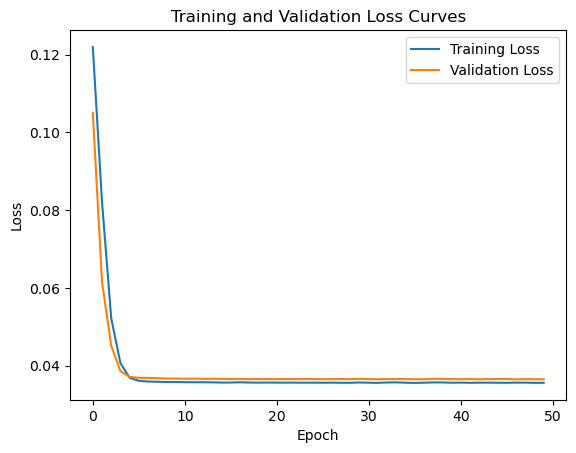

Val loss: 0.03649564543339558
Fold : 1
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 1s - loss: 0.1219 - val_loss: 0.1041 - val_CRPS: 0.1041 - 1s/epoch - 57ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0822 - val_loss: 0.0610 - val_CRPS: 0.0610 - 341ms/epoch - 14ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0524 - val_loss: 0.0446 - val_CRPS: 0.0446 - 350ms/epoch - 15ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0409 - val_loss: 0.0378 - val_CRPS: 0.0378 - 338ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0372 - val_loss: 0.0362 - val_CRPS: 0.0362 - 348ms/epoch - 15ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0363 - val_loss: 0.0359 - val_CRPS: 0.0359 - 356ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s

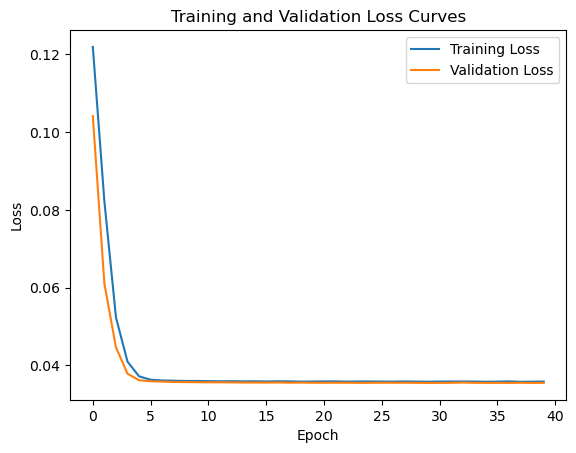

Val loss: 0.03545874981271034
Fold : 2
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 1s - loss: 0.1218 - val_loss: 0.1048 - val_CRPS: 0.1048 - 1s/epoch - 55ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0821 - val_loss: 0.0607 - val_CRPS: 0.0607 - 336ms/epoch - 14ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0522 - val_loss: 0.0438 - val_CRPS: 0.0438 - 335ms/epoch - 14ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0408 - val_loss: 0.0371 - val_CRPS: 0.0371 - 333ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0373 - val_loss: 0.0353 - val_CRPS: 0.0353 - 347ms/epoch - 14ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0364 - val_loss: 0.0349 - val_CRPS: 0.0349 - 359ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s

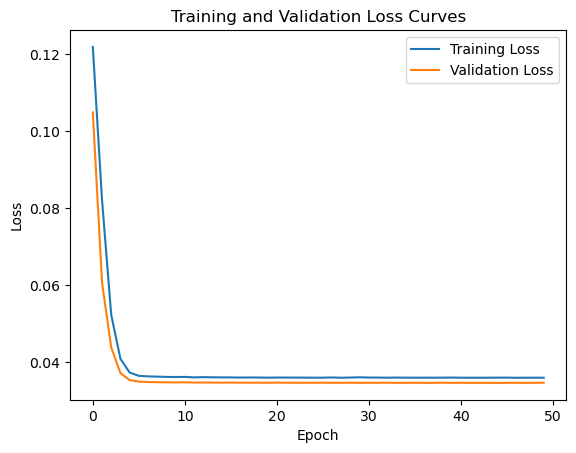

Val loss: 0.0345548999341965
Fold : 3
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 1s - loss: 0.1217 - val_loss: 0.1054 - val_CRPS: 0.1054 - 1s/epoch - 55ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0823 - val_loss: 0.0620 - val_CRPS: 0.0620 - 335ms/epoch - 14ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0524 - val_loss: 0.0458 - val_CRPS: 0.0458 - 338ms/epoch - 14ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0409 - val_loss: 0.0394 - val_CRPS: 0.0394 - 334ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0370 - val_loss: 0.0378 - val_CRPS: 0.0378 - 346ms/epoch - 14ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0360 - val_loss: 0.0376 - val_CRPS: 0.0376 - 363ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s 

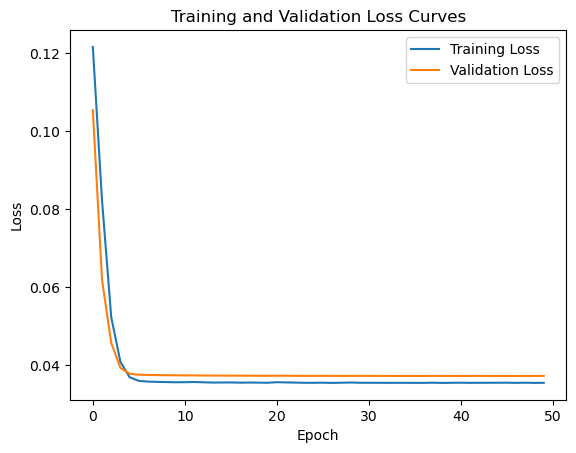

Val loss: 0.03727879110287677
Fold : 4
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 1s - loss: 0.1219 - val_loss: 0.1059 - val_CRPS: 0.1059 - 1s/epoch - 57ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0824 - val_loss: 0.0614 - val_CRPS: 0.0614 - 336ms/epoch - 14ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0526 - val_loss: 0.0445 - val_CRPS: 0.0445 - 337ms/epoch - 14ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0411 - val_loss: 0.0378 - val_CRPS: 0.0378 - 341ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0372 - val_loss: 0.0360 - val_CRPS: 0.0360 - 349ms/epoch - 15ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0363 - val_loss: 0.0355 - val_CRPS: 0.0355 - 359ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s

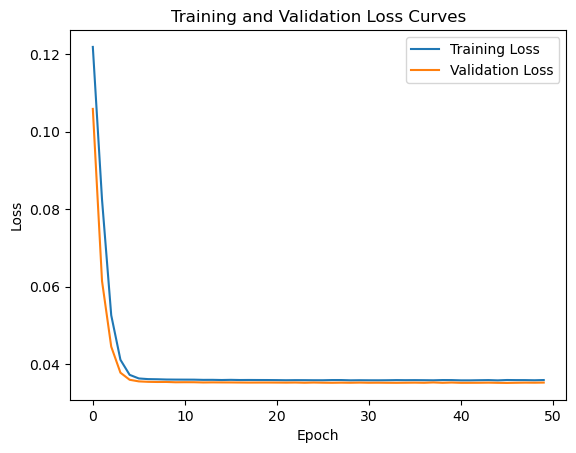

Val loss: 0.035136553070686
Fold : 5
Epoch 1/50
7/7 [==============================] - 0s 4ms/step
24/24 - 1s - loss: 0.1217 - val_loss: 0.1052 - val_CRPS: 0.1052 - 1s/epoch - 60ms/step
Epoch 2/50
7/7 [==============================] - 0s 3ms/step
24/24 - 0s - loss: 0.0819 - val_loss: 0.0617 - val_CRPS: 0.0617 - 403ms/epoch - 17ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0520 - val_loss: 0.0454 - val_CRPS: 0.0454 - 373ms/epoch - 16ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0406 - val_loss: 0.0392 - val_CRPS: 0.0392 - 349ms/epoch - 15ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0369 - val_loss: 0.0378 - val_CRPS: 0.0378 - 454ms/epoch - 19ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0360 - val_loss: 0.0377 - val_CRPS: 0.0377 - 368ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 0s 2

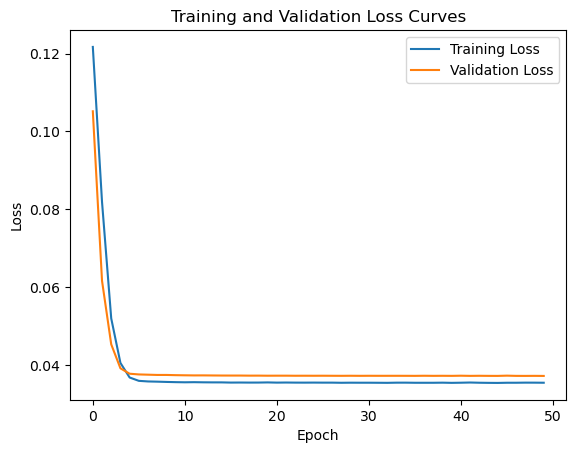

Val loss: 0.03727816080113872
Fold : 6
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 2s - loss: 0.1219 - val_loss: 0.1051 - val_CRPS: 0.1051 - 2s/epoch - 63ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0823 - val_loss: 0.0607 - val_CRPS: 0.0607 - 396ms/epoch - 16ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0523 - val_loss: 0.0438 - val_CRPS: 0.0438 - 448ms/epoch - 19ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0409 - val_loss: 0.0371 - val_CRPS: 0.0371 - 386ms/epoch - 16ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0373 - val_loss: 0.0353 - val_CRPS: 0.0353 - 400ms/epoch - 17ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0364 - val_loss: 0.0349 - val_CRPS: 0.0349 - 407ms/epoch - 17ms/step
Epoch 7/50
7/7 [==============================] - 0s

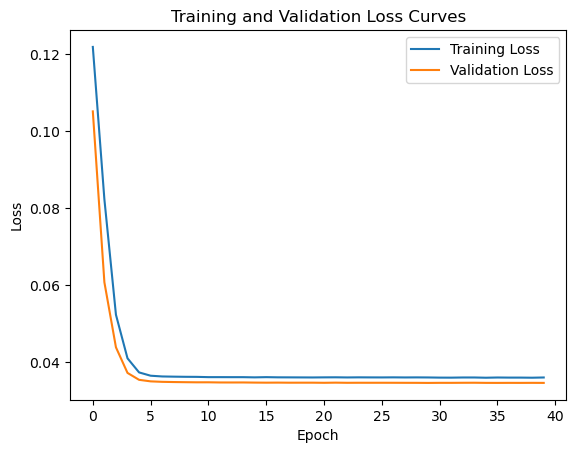

Val loss: 0.034530607992658245
Fold : 7
Epoch 1/50
7/7 [==============================] - 0s 2ms/step
24/24 - 9s - loss: 0.1219 - val_loss: 0.1050 - val_CRPS: 0.1050 - 9s/epoch - 388ms/step
Epoch 2/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0822 - val_loss: 0.0610 - val_CRPS: 0.0610 - 333ms/epoch - 14ms/step
Epoch 3/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0524 - val_loss: 0.0442 - val_CRPS: 0.0442 - 329ms/epoch - 14ms/step
Epoch 4/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0409 - val_loss: 0.0374 - val_CRPS: 0.0374 - 339ms/epoch - 14ms/step
Epoch 5/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0372 - val_loss: 0.0357 - val_CRPS: 0.0357 - 351ms/epoch - 15ms/step
Epoch 6/50
7/7 [==============================] - 0s 2ms/step
24/24 - 0s - loss: 0.0364 - val_loss: 0.0353 - val_CRPS: 0.0353 - 351ms/epoch - 15ms/step
Epoch 7/50
7/7 [==============================] - 

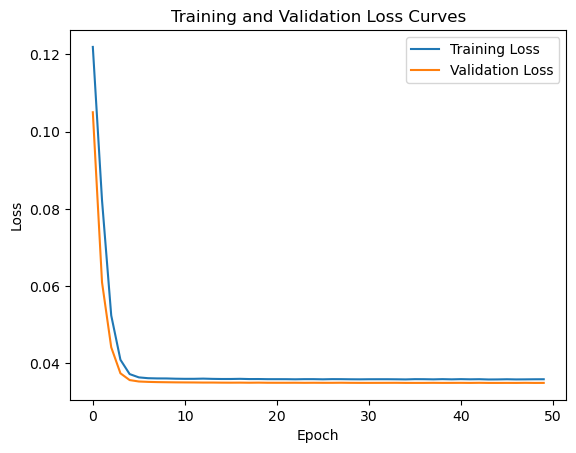

Val loss: 0.034933246994000966
0.03570833189270789
CPU times: user 9min, sys: 1min 17s, total: 10min 18s
Wall time: 2min 36s


In [284]:
%%time 

models = []
kf = KFold(n_splits=8, shuffle=True, random_state=42)
score = []

# Create an empty DataFrame to store results
results_list = []

for i, (tdx, vdx) in enumerate(kf.split(train_x, train_y)):
    print(f'Fold : {i}')
    X_train, X_val = train_x[tdx], train_x[vdx],
    y_train, y_val = train_y.iloc[tdx]['YardIndexClipped'].values, train_y.iloc[vdx]['YardIndexClipped'].values

    y_train_values = np.zeros((len(y_train), num_classes_y), np.int32)
    for irow, row in enumerate(y_train):
        y_train_values[(irow, row - min_idx_y)] = 1
        
    y_val_values = np.zeros((len(y_val), num_classes_y), np.int32)
    for irow, row in enumerate(y_val - min_idx_y):
        y_val_values[(irow, row)] = 1

    y_train_values = y_train_values.astype('float32')
    y_val_values = y_val_values.astype('float32')
    
    model = get_conv_net(num_classes_y)

    es = EarlyStopping(monitor='val_CRPS',
                        mode='min',
                        restore_best_weights=True,
                        verbose=0,
                        patience=10)
    
    es.set_model(model)
    metric = Metric(model, [es], [X_val, y_val_values])

    lr_i = 1e-3
    lr_f = 5e-4
    n_epochs = 50 

    decay = (1-lr_f/lr_i)/((lr_f/lr_i)* n_epochs - 1)  #Time-based decay formula
    alpha = (lr_i*(1+decay))
    
    opt = Adam(learning_rate=1e-3)
    model.compile(loss=crps,
                  optimizer=opt)
    
    model.fit(X_train,
              y_train_values, 
              epochs=n_epochs,
              batch_size=64,
              verbose=2,
              callbacks=[metric],
              validation_data=(X_val, y_val_values))
    
    # Get training and validation loss history
    training_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']

    # Plot loss curves
    plt.plot(training_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Training and Validation Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    val_crps_score = min(model.history.history['val_CRPS'])
    print("Val loss: {}".format(val_crps_score))
    
    score.append(val_crps_score)

    models.append(model)
    
    # Append results to DataFrame
    results_list.append({'Fold': i, 'Val_CRPS': val_crps_score, 'Actual': y_val_values, 'Predictions': y_pred_val})

print(np.mean(score))

In [226]:
print("The mean validation loss is {}".format(np.mean(score)))

The mean validation loss is 0.0357126768403368
